In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
companies = ['google', 'meta', 'amazon']
dfs = {company: pd.read_csv(f'{company}.csv', index_col='Year') for company in companies}
for k,df in dfs.items():
    df["Revenue_int"] = df["Revenue"].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
    df["Revenue_growth"] = df['Revenue_int'].pct_change(-1)
    df.dropna(inplace=True)

dfs['google'].head()

,Employees,Revenue,Revenue_int,Revenue_growth
Year,,,,
2022,190234,"$282,836",282836,0.097808
2021,156500,"$257,637",257637,0.411501
2020,135301,"$182,527",182527,0.127705
2019,118899,"$161,857",161857,0.183001
2018,98771,"$136,819",136819,0.234216


C:\Users\admin\AppData\Local\Temp\ipykernel_8428\1193403321.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.yaxis.set_ticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])


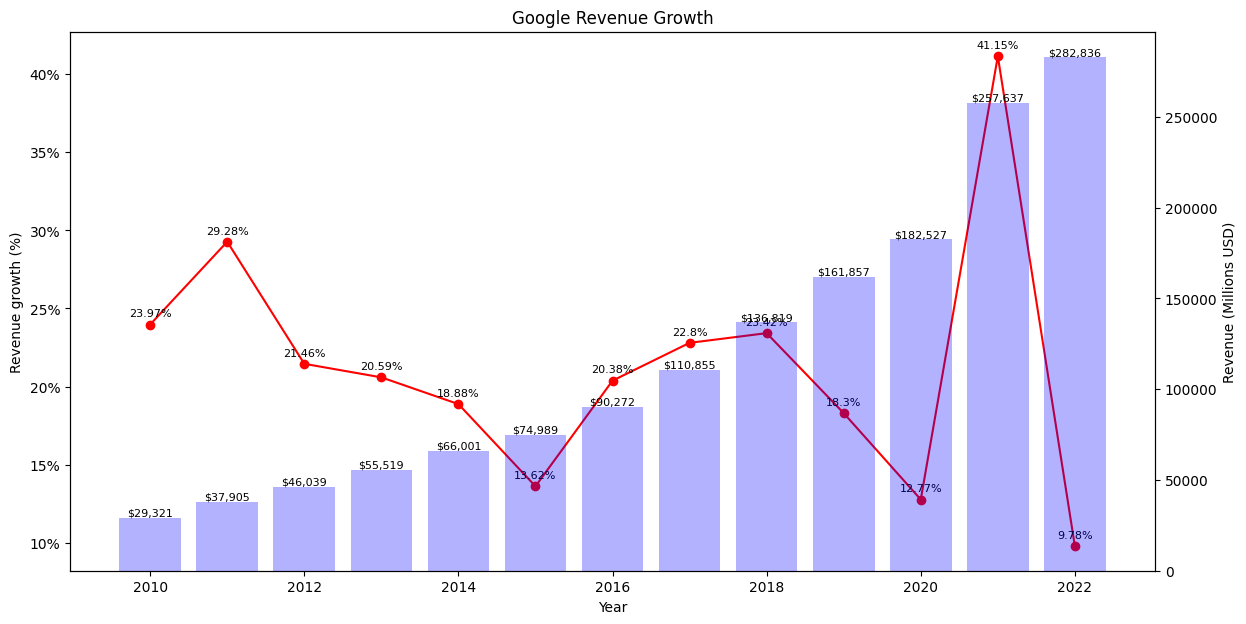

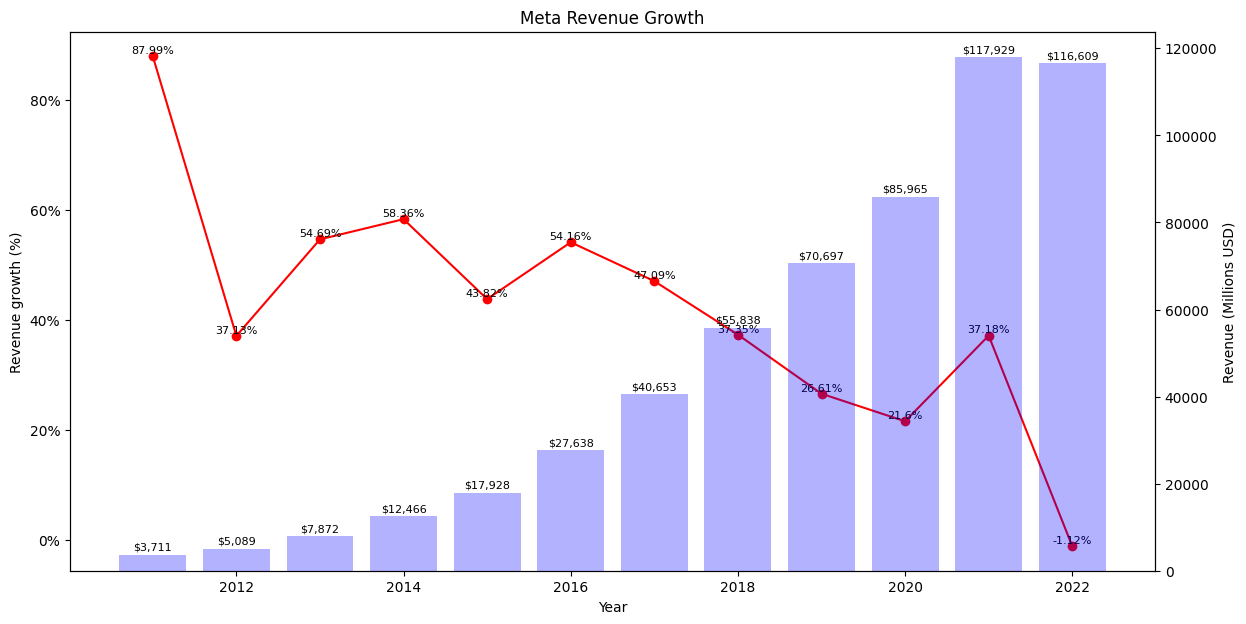

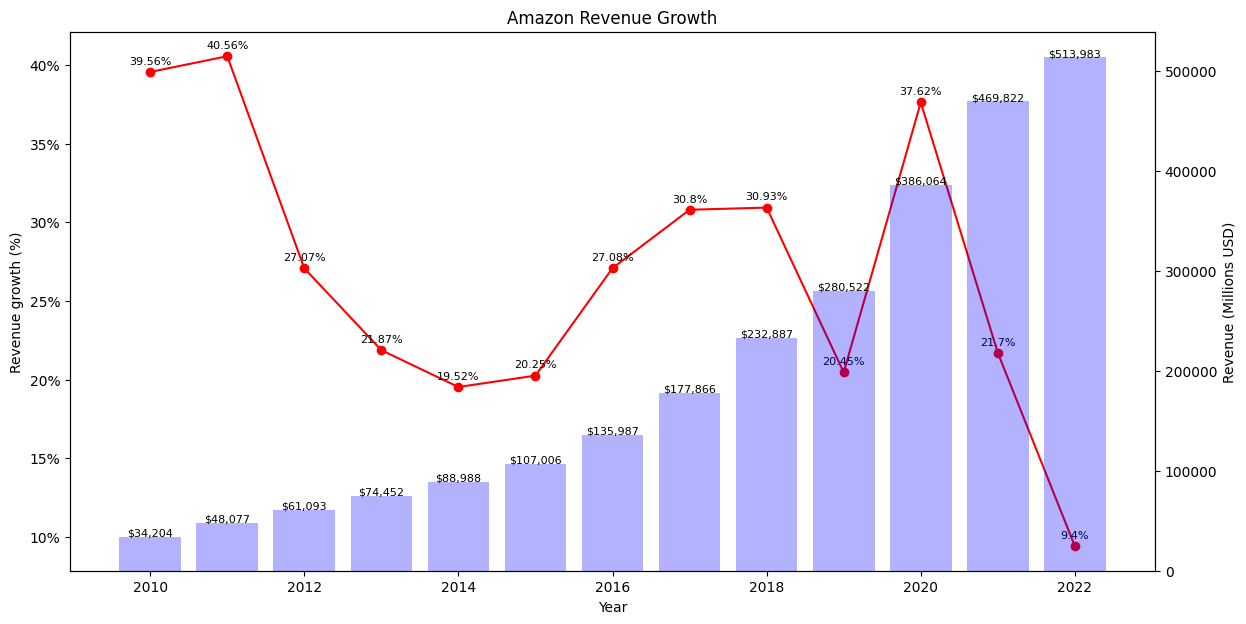

In [58]:
for company, df in dfs.items():
    # plot a line graph of revenue growth and bar graph of revenue
    fig = plt.figure(figsize=(14, 7))
    ax1 = plt.subplot(1, 1, 1)
    line = ax1.plot(df.index, df['Revenue_growth'], marker='o', color='red')
    ax1.set_xlabel("Year")
    ax1.set_ylabel('Revenue growth (%)')
    #ax1.set_ylim(-0.1, 1)
    #ax1.yaxis.set_ticks(np.arange(-0.1, 1, 0.15))
    ax1.yaxis.set_ticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])
    ax2 = plt.twinx()
    bar = ax2.bar(df.index, df['Revenue_int'], color='blue', alpha=0.3)
    ax2.set_ylabel('Revenue (Millions USD)')

    # add labels to each point
    for i, v in enumerate(df['Revenue_growth']):
        if i==100: ax1.text(df.index[i], v-0.02, str(round(v*100, 2))+'%', ha='center', fontsize=8)
        else: ax1.text(df.index[i], v+0.005, str(round(v*100, 2))+'%', ha='center', fontsize=8)
    for i, v in enumerate(df['Revenue']):
        ax2.text(df.index[i], df['Revenue_int'][df.index[i]]+1000, v, ha='center', fontsize=8)

    plt.title('%s Revenue Growth' % company.capitalize())
    plt.xlabel('Year')
    plt.show()